In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
from scipy.stats import pearsonr

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

# Role Importance Analysis

In [12]:
# 3 datasets
# for each dataset, avg and std of role 
n_1= 10
n_2=10
n_3=5
data_1 = {
    'ActorID': range(1, n_1 + 1),
    'Name': [f'Actor_{i}' for i in range(1, n_1 + 1)],
    'Age': np.random.randint(25, 60, size=n_1),
    'avg_role_0': np.random.randint(0, 100, size=n_1),
    'std_role_0': np.random.randint(0, 10, size=n_1),
    'success': np.random.randint(0, 10, size=n_1),

    
}
data_2 = {
    'ActorID': range(1, n_2 + 1),
    'Name': [f'Actor_{i}' for i in range(1, n_2 + 1)],
    'Age': np.random.randint(25, 60, size=n_2),
    'avg_role_0': np.random.randint(0, 100, size=n_2),
    'std_role_0': np.random.randint(0, 10, size=n_2),
    'avg_role_1': np.random.randint(0, 100, size=n_2),
    'std_role_1': np.random.randint(0, 10, size=n_2),
    'success': np.random.randint(0, 10, size=n_1),
    
}
data_3 = {
    'ActorID': range(1, n_3 + 1),
    'Name': [f'Actor_{i}' for i in range(1, n_3 + 1)],
    'Age': np.random.randint(25, 60, size=n_3),
    'avg_role_0': np.random.randint(0, 100, size=n_3),
    'std_role_0': np.random.randint(0, 10, size=n_3),
    'avg_role_1': np.random.randint(0, 100, size=n_3),
    'std_role_1': np.random.randint(0, 10, size=n_3),
    'avg_role_2': np.random.randint(0, 100, size=n_3),
    'std_role_2': np.random.randint(0, 10, size=n_3),
    'success': np.random.randint(0, 10, size=n_3),
    
}

actor_1 = pd.DataFrame(data_1)
actor_2 = pd.DataFrame(data_2)
actor_3 = pd.DataFrame(data_3)



In [64]:
full_data={

    'ActorID': range(1, n_3+n_2+n_1 + 1),
    'Name': [f'Actor_{i}' for i in range(1, n_3+n_2+n_1 + 1)],
    'Age': np.random.randint(25, 60, size=n_3+n_2+n_1),
    'avg_role_0': np.random.randint(0, 100, size=n_3+n_2+n_1),
    'std_role_0': np.random.randint(0, 10, size=n_3+n_2+n_1),
    'avg_role_1': np.random.randint(0, 100, size=n_3+n_2+n_1),
    'std_role_1': np.random.randint(0, 10, size=n_3+n_2+n_1),
    'avg_role_2': np.random.randint(0, 100, size=n_3+n_2+n_1),
    'std_role_2': np.random.randint(0, 10, size=n_3+n_2+n_1),
    'success': np.random.randint(0, 10, size=n_3+n_2+n_1),
}

full_df= pd.DataFrame(full_data)

In [24]:
avg_role_beginning= np.concatenate([actor_1['avg_role_0'],actor_2['avg_role_0'],actor_3['avg_role_0']])
avg_role_mid= np.concatenate([actor_2['avg_role_1'],actor_3['avg_role_1']])
avg_role_end= np.array(actor_3['avg_role_2'])
std_role_beginning= np.concatenate([actor_1['std_role_0'],actor_2['std_role_0'],actor_3['std_role_0']])
std_role_mid= np.concatenate([actor_2['std_role_1'],actor_3['std_role_1']])
std_role_end= np.array(actor_3['std_role_2'])
success_1= np.concatenate([actor_1['success'],actor_2['success'],actor_3['success']])
success_2= np.concatenate([actor_2['success'],actor_3['success']])
success_3= np.array(actor_3['success'])


[16 22 44 81 42 95 39 60 84 34 75 45 13 89 56]


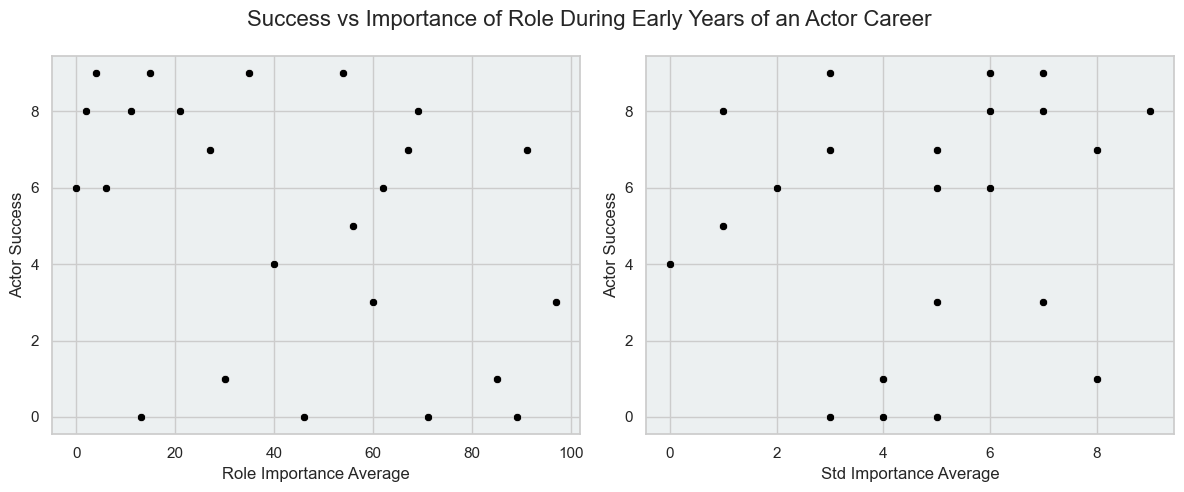

In [49]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role During Early Years of an Actor Career ', fontsize=16)
# Flatten the 3 by 2 array of subplots into a 1D array for easier indexing
axes = axes.flatten()
sns.set_theme()
light_blue = '#ECF0F1'
light_green = '#D5F5E3'
light_yellow = '#FFFFE0'
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_role_beginning, y=success_1, ax=axes[0],  color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_blue)


# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_beginning, y=success_1, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_blue)



plt.tight_layout()
plt.show()

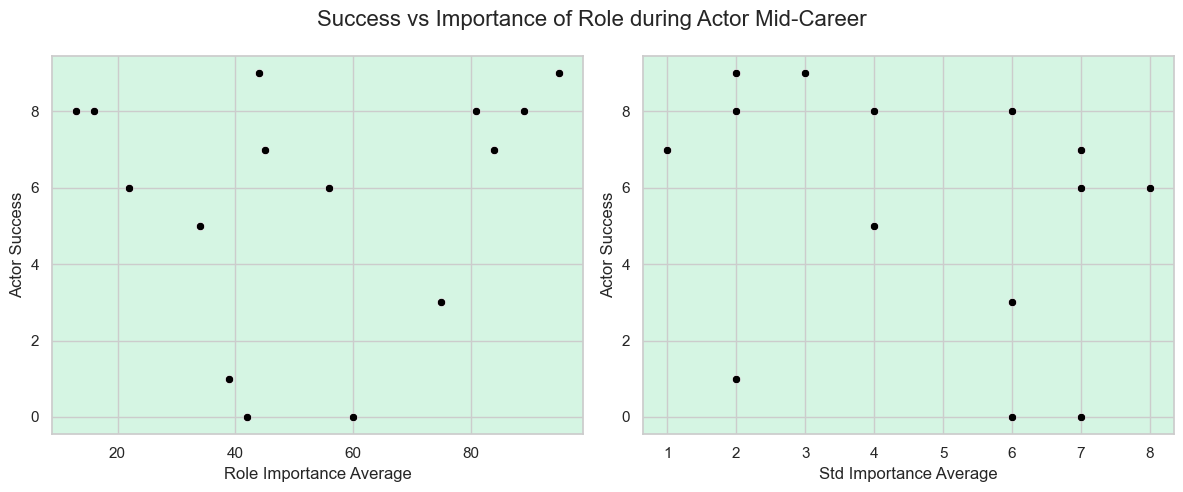

In [52]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role during Actor Mid-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_role_mid, y=success_2, ax=axes[0], color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_green)

# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_mid, y=success_2, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_green)

plt.tight_layout()
plt.show()


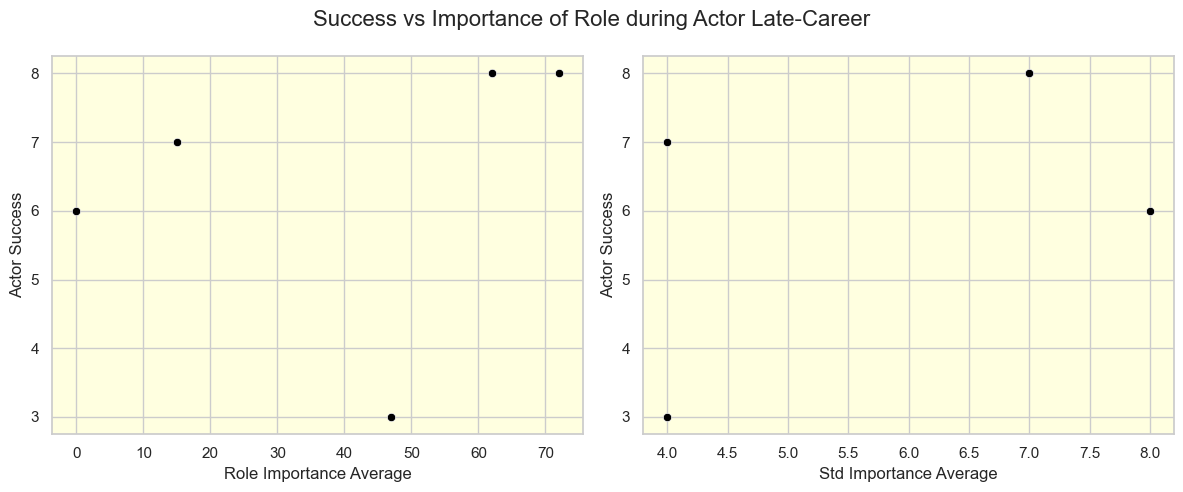

In [51]:

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role during Actor Late-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

sns.scatterplot(x=avg_role_end, y=success_3, ax=axes[0], color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_yellow)

# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_end, y=success_3, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_yellow)


plt.tight_layout()
plt.show()

## Hypothesis testing: Pearson Correlation

In [63]:
# Role importance Averages
cc_av=np.zeros(3)
p_av=np.zeros(3)
cc_av[0], p_av[0] = pearsonr(avg_role_beginning, success_1) # Early Years
cc_av[1], p_av[1] = pearsonr(avg_role_mid, success_2) # Mid-Career
cc_av[2], p_av[2] = pearsonr(avg_role_end, success_3) # Late-Career 

# Role Importance Standard deviation
cc_std=np.zeros(3)# Correlation Coefficient
p_std=np.zeros(3) # Pvalue
cc_std[0], p_av[0] = pearsonr(std_role_beginning, success_1) # Early Years
cc_std[1], p_av[1] = pearsonr(std_role_mid, success_2) # Mid-Career
cc_std[2], p_av[2] = pearsonr(std_role_end, success_3) # Late-Career 

print("p-value average:", p_av)
print("p-value standard deviation:", p_std)


p-value average: [0.46170305 0.24790061 0.37395772]
p-value standard deviation: [0. 0. 0.]


## Regression Analysis: Gradient Boosting Regression

In [ ]:
def numpy_helper(df, cols):
    new_array = df[cols].values.astype(float)
    return new_array

In [67]:
# instead of accuracy, precision and recall (more used for classification), use MSE (Mean Square Error) and R-squared

# average 
# X_1 stack actor1[common features, avg_0] , actor 2[common features, avg_0], actor 3[common features, avg_0]
# X_2 stack actor1[common features group 2, avg_1.dropna] , actor 2[common features, avg_1.dropna], actor 3[common features_group2, avg1.dropna]

# Early years- average role
features_1= ['Age', 'std_role_0']
X_1= full_df[features_1] #all features except avg_0
y_1= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['Age', 'std_role_0', 'avg_role_0'] #all features
X_2= full_df[features_2]
y_2= full_df['success']
model2= GradientBoostingRegressor()
results_model2 = cross_validate(model2, X_2, y_2, cv=3)

print('Prediction without average role- early years:',results_model1 )
print('Prediction with average role- early years:',results_model2 )

# Early years- std role
features_1= ['Age', 'avg_role_0'] #all features except std_0
X_1= full_df[features_1]
y_1= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['Age', 'std_role_0', 'avg_role_0'] #all features
X_2= full_df[features_2]
y_2= full_df['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std role- early years:',results_model1 )
print('Prediction with std role- early years:',results_model2 )

# Mid-Career- avg role
df_filter=full_df.dropna(subset=['avg_role_1']) # Remove actors who don't have film in Phase 2 of career (ie keep group 2 and 3)
features_1= ['Age', 'avg_role_0', 'std_role_0', 'std_role_1'] #all features except avg_1
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['Age', 'std_role_0', 'avg_role_0', 'avg_role_1', 'std_role_1'] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without avg role- Mid years:',results_model1 )
print('Prediction with avg role- Mid years:',results_model2 )

# Mid-Career- std role
features_1= ['Age', 'avg_role_0', 'std_role_0', 'avg_role_1'] #all features except std_1
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['Age', 'std_role_0', 'avg_role_0', 'avg_role_1', 'std_role_1'] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std role- Mid years:',results_model1 )
print('Prediction with std role- Mid years:',results_model2 )

# Late-Career- avg role
df_filter=full_df.dropna(subset=['avg_role_2']) # Remove actors who don't have movies in Phase 3 of career (i.e keep group 3 rows)
features_1= ['Age', 'avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'std_role_2' ] # all features except avg_2
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['Age', 'avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'avg_role_2','std_role_2' ] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without avg role- End years:',results_model1 )
print('Prediction with avg role- End years:',results_model2 )

# Late-Career- std role
features_1= ['Age', 'avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'avg_role_2'] # all features except std_2
X_1= df_filter[features_1]
y_1= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_1, y_1, cv=3)
features_2= ['Age', 'avg_role_0', 'std_role_0', 'avg_role_1','std_role_1', 'avg_role_2','std_role_2' ] #all features
X_2= df_filter[features_2]
y_2= df_filter['success']
model1= GradientBoostingRegressor()
results_model1 = cross_validate(model1, X_2, y_2, cv=3)

print('Prediction without std role- End years:',results_model1 )
print('Prediction with std role- End years:',results_model2 )





Prediction without average role- early years: {'fit_time': array([0.04812741, 0.05539966, 0.06480122]), 'score_time': array([0.       , 0.0087657, 0.       ]), 'test_score': array([-0.98442075, -1.82952351, -1.56602335])}
Prediction with average role- early years: {'fit_time': array([0.06709385, 0.0498054 , 0.04039168]), 'score_time': array([0.00600719, 0.        , 0.        ]), 'test_score': array([-1.66093765, -3.35195282, -0.40285599])}
Prediction without std role- early years: {'fit_time': array([0.08544469, 0.09061503, 0.07428503]), 'score_time': array([0.00433016, 0.01083541, 0.00312877]), 'test_score': array([-1.64492349, -3.38867829, -0.39617964])}
Prediction with std role- early years: {'fit_time': array([0.06709385, 0.0498054 , 0.04039168]), 'score_time': array([0.00600719, 0.        , 0.        ]), 'test_score': array([-1.66093765, -3.35195282, -0.40285599])}
Prediction without avg role- Mid years: {'fit_time': array([0.05174184, 0.1084373 , 0.10517454]), 'score_time': array